<a href="https://colab.research.google.com/github/CarmenRaposo/06MAIR-Aprendizaje-No-Supervisado-Trabajo-Final/blob/master/Trabajo%20Final/Trabajo_Final_Jerarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Parte inicial genérica:

In [0]:
import numpy as np
import pandas as pd
import itertools as it
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

(150, 4)


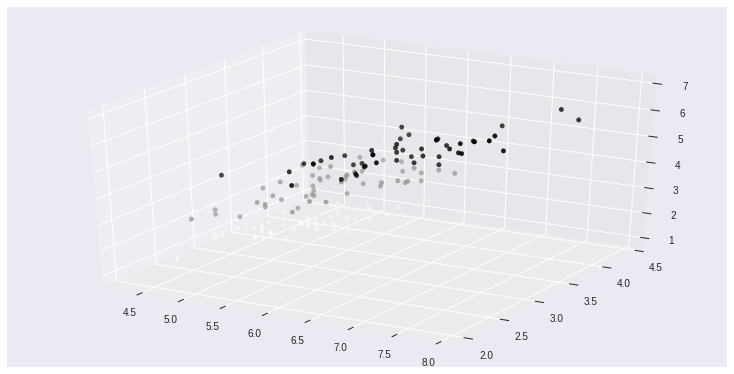

In [22]:
iris = datasets.load_iris()
Dx = iris.data[:, :3]  # we only take the first three features.
Dy = iris.target
print(iris.data.shape)

fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig)
ax.scatter(Dx[:,0],Dx[:,1],Dx[:,2], c=Dy)

# Algoritmos Jerárquicos
## Algoritmo Jerárquico aglomerativo

Usamos las funciones disponibles en las distintas librerias de Python

In [0]:
#Importamos librerias necesarias para los algoritmos aglomerativos
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster, cut_tree
# Importamos la libreria para el método dendrogram de scipy
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster


#Con el paámetro linkage podemos controlar los criterios usados. 
#Probaremos 3 criterios: disimilitud mínima : 'single'; máxima: 'complete'; y media: 'average'

#Dx viene definido al inicio del notebook y es comun para los 3 bloques.

modelo_single = AgglomerativeClustering(linkage="single")
modelo_single = modelo_single.fit(Dx)

modelo_complete = AgglomerativeClustering(linkage="complete")
modelo_complete = modelo_complete.fit(Dx)

modelo_average = AgglomerativeClustering(linkage="average")
modelo_average = modelo_average.fit(Dx)



Dendrograma según criterio de disimilitud: mínima, máxima, media


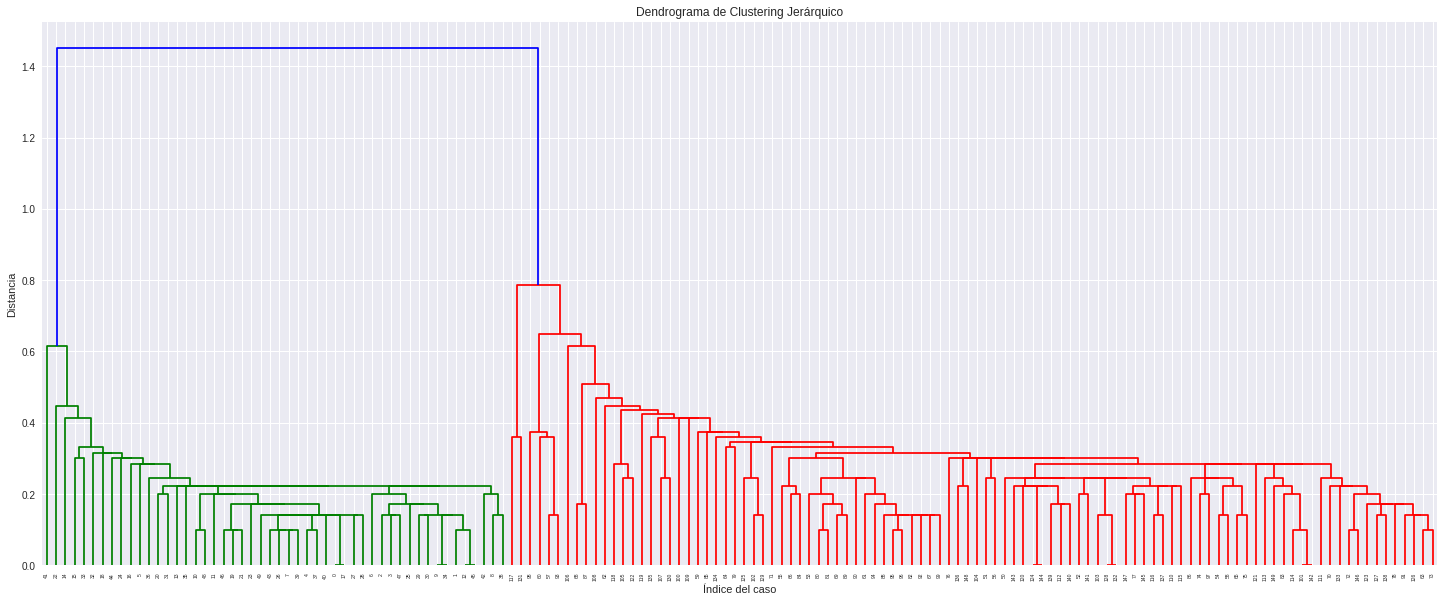

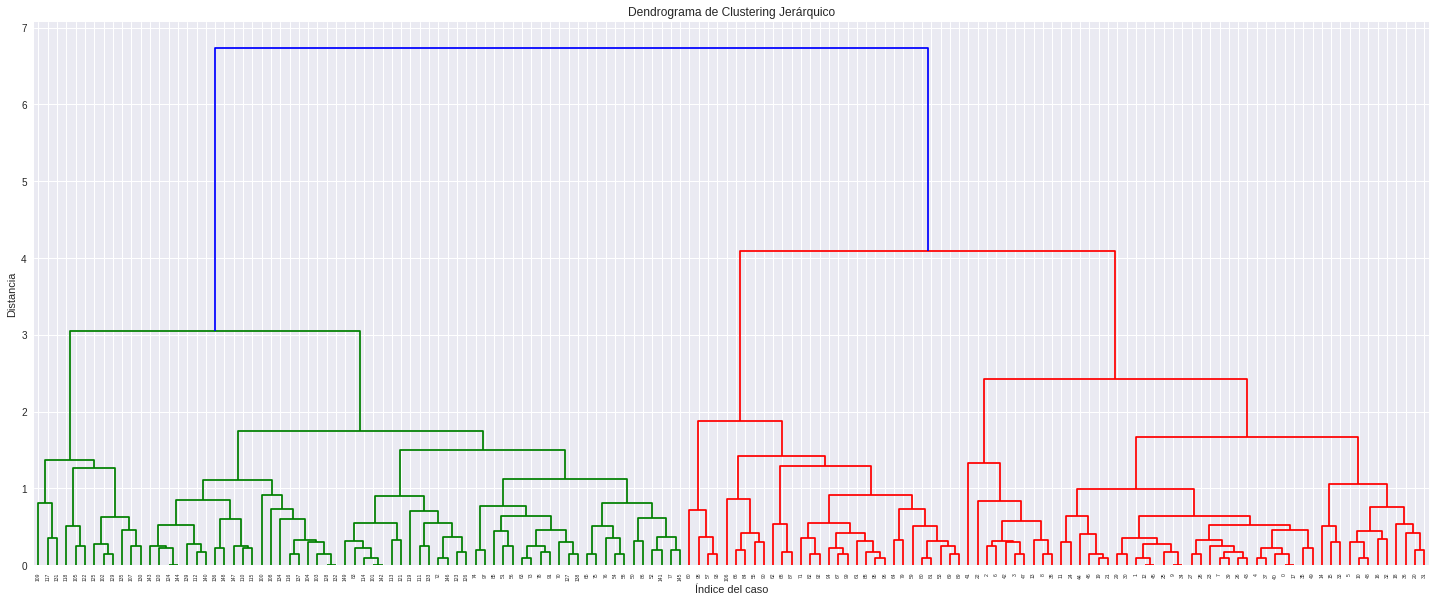

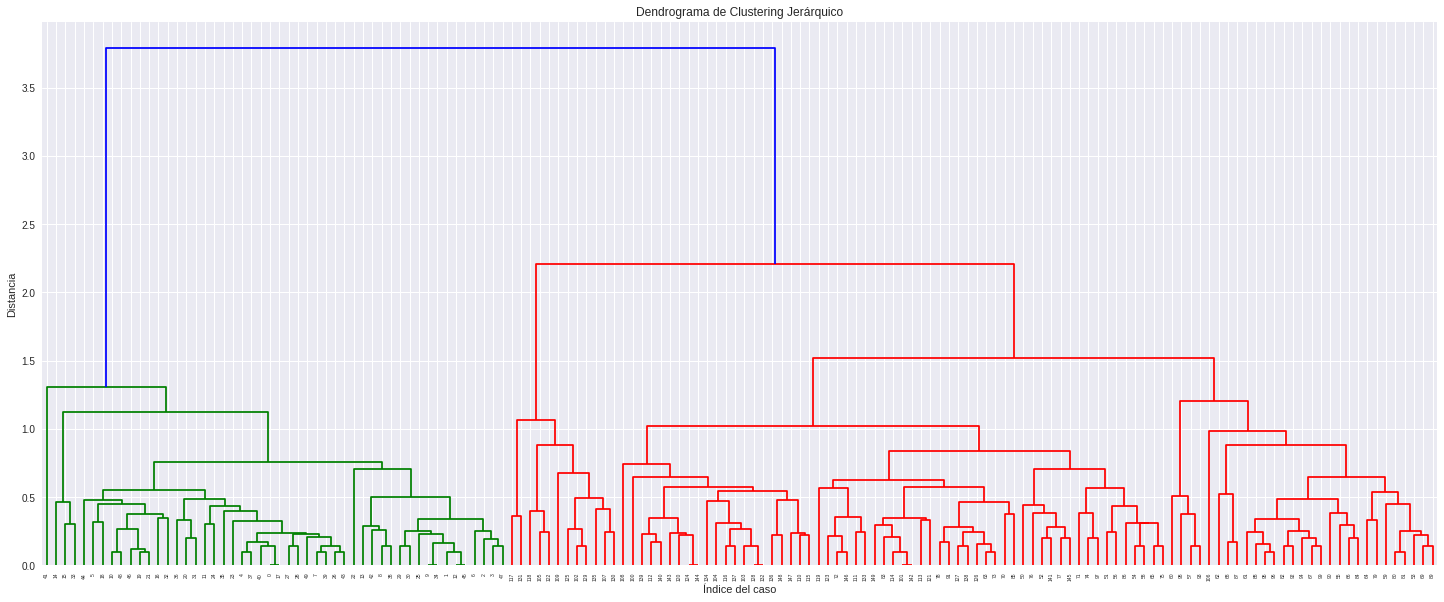

In [24]:
def matriz_enlaces(modelo):
  # Creamos la matriz de enlaces que necesita el método dendrogram de scipy
  uniones = modelo.children_
  # Las distancias y los tamaños, en esta ocasión, los asignamos de manera 
  # inocua para no alterar el resultado (no disponemos de la información completa)
  distancias = np.arange(uniones.shape[0])
  tamanyos = np.arange(2, uniones.shape[0]+2)
  mEnlaces = np.column_stack([uniones, distancias, tamanyos]).astype(float)

  return dendrogram(mEnlaces)

#función imprimir dendrograma
def plot_den(modelo):
  plt.figure(figsize=(25, 10))
  plt.title('Dendrograma de Clustering Jerárquico')
  plt.xlabel('Índice del caso')
  plt.ylabel('Distancia')
  dendrogram(modelo)
  plt.show() 
  
  
# Creamos la matriz de enlaces para cada criterio
#matriz_enlaces(modelo_single)
#matriz_enlaces(modelo_complete)
#matriz_enlaces(modelo_average)


modelo_single = linkage(Dx, 'single')   # disimilitud mínima
modelo_complete = linkage(Dx, 'complete') # disimilitud máxima
modelo_average = linkage(Dx, 'average')  # disimilitud media

#Representamos el dendrograma según cada criterio de disimilitud
print("Dendrograma según criterio de disimilitud: mínima, máxima, media")
plot_den(modelo_single)
plot_den(modelo_complete)
plot_den(modelo_average)

#clusters = fcluster(mEnlaces, 3, criterion='maxclust')
#print(clusters)

In [0]:
from sklearn.metrics import mutual_info_score, silhouette_score,  calinski_harabaz_score

def calcular_clusters(modelo, K):
  return cut_tree(modelo, n_clusters = K).flatten()

def evaluar_cluster(K):

    clust_single=calcular_clusters(modelo_single, K)
  
    clust_complete=calcular_clusters(modelo_complete, K)

    clust_average=calcular_clusters(modelo_average, K)

    return clust_single, clust_complete, clust_average
    
def plot_cluster(Dx, Dy, vector_clusters):
    fig, ax = plt.subplots(1,4, figsize=(20,5))
    ax[0].scatter(Dx[:,0], Dx[:,1], c=Dy)
    ax[0].set_title('Datos originales')
    plt.figure(figsize=(25, 10))
    

    ax[1].scatter(Dx[:,0], Dx[:,1], c=vector_clusters[0], cmap='rainbow')
    ax[1].set_title('Disimilitud mínima, k=%s'%K)
        

    ax[2].scatter(Dx[:,0], Dx[:,1], c=vector_clusters[1], cmap='rainbow')
    ax[2].set_title('Disimilitud máxima, k=%s'%K)
    

    ax[3].scatter(Dx[:,0], Dx[:,1], c=vector_clusters[2], cmap='rainbow')
    ax[3].set_title('Disimilitud media, k=%s'%K)
    
    plt.figure()


In [0]:
def matriz_confusion(cat_real, cat_pred):
    cats = np.unique(cat_real)
    clusts = np.unique(cat_pred)
    mat = np.array([[np.sum(np.logical_and(cat_real==cats[i], cat_pred==clusts[j])) 
                     for j in np.arange(clusts.size)] 
                    for i in np.arange(cats.size)])
    return(mat)

def medida_error(mat):
    assign = np.sum([np.max(mat[l,:]) for l in np.arange(mat.shape[0])])
    return 1 - assign / float(np.sum(mat))

def medida_pureza(mat):
    totales = np.sum(mat,0)/float(np.sum(mat))
    return np.sum([totales[k] * np.max(mat[:,k]/float(np.sum(mat[:,k]))) for k in np.arange(mat.shape[1])])

def medida_precision(mat, l, k):
    return mat[l,k]/float(np.sum(mat[:,k]))

def medida_recall(mat, l, k):
    return mat[l,k]/float(np.sum(mat[l,:]))

def medida_f1_especifica(mat, l, k):
    prec = medida_precision(mat, l, k)
    rec = medida_recall(mat, l, k)
    if (prec+rec)==0:
        return 0
    else:
        return 2*prec*rec/(prec+rec)

def medida_f1(mat):
    totales = np.sum(mat,1)/float(np.sum(mat))
    assign = np.sum([totales[l] * np.max([medida_f1_especifica(mat, l, k) 
                                          for k in np.arange(mat.shape[1])]) 
                     for l in np.arange(mat.shape[0])])
    return assign


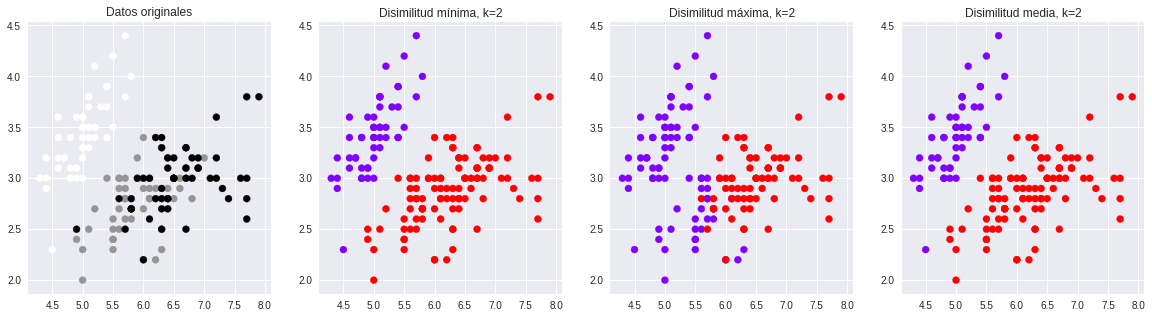

<Figure size 1800x720 with 0 Axes>

<Figure size 576x396 with 0 Axes>

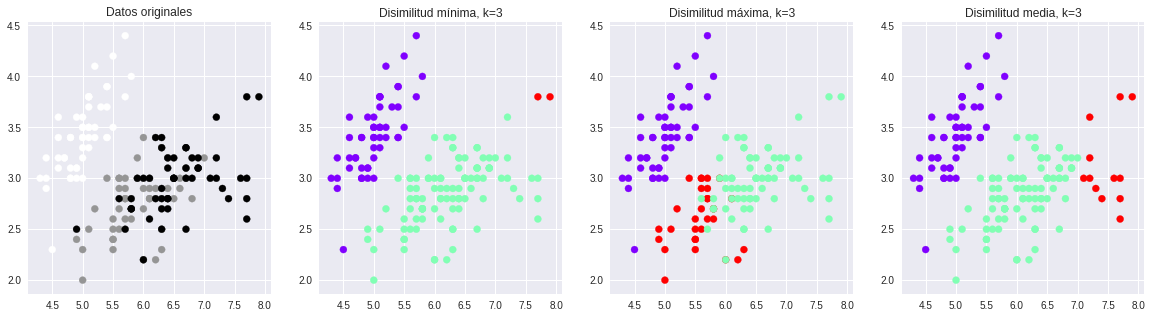

<Figure size 1800x720 with 0 Axes>

<Figure size 576x396 with 0 Axes>

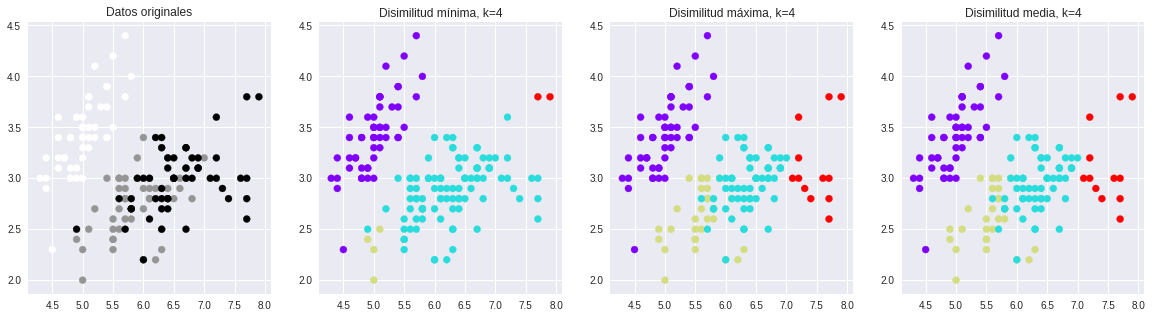

<Figure size 1800x720 with 0 Axes>

<Figure size 576x396 with 0 Axes>

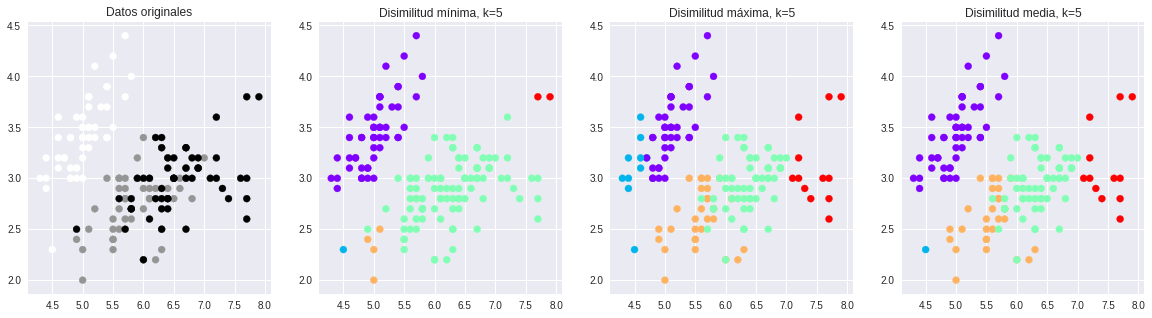

<Figure size 1800x720 with 0 Axes>

<Figure size 576x396 with 0 Axes>

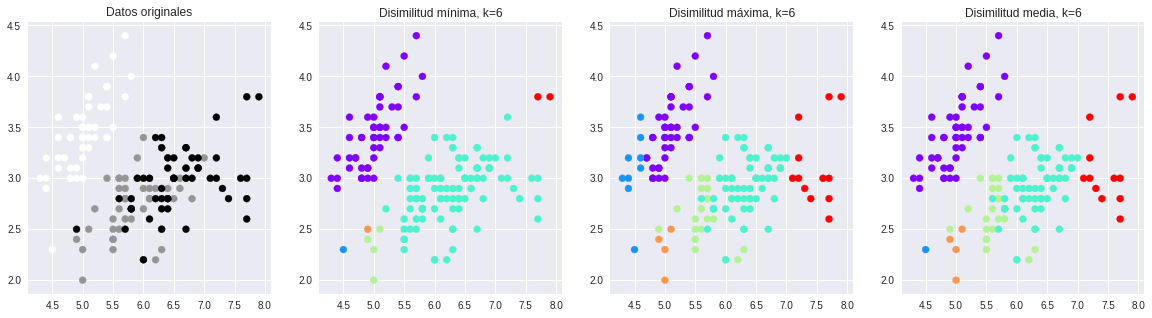

<Figure size 1800x720 with 0 Axes>

<Figure size 576x396 with 0 Axes>

In [26]:
#Evaluamos el método según diferentes valores de K y usando los 3 criterios de disimilitud: mínima, máxima, media

index_k=0
vector_clusters = {}
for K in range(2,7):
  vector_clusters[index_k]=evaluar_cluster(K)
  plot_cluster(Dx, Dy, vector_clusters[index_k])
  index_k=index_k+1

In [28]:
for i in range(len(vector_clusters)):
  print("")
  print("")
  print("Metricas evaluación:")
  print('K=%s'%(i+2))
  for y in range(len(vector_clusters[i])):
    print()
    mC = matriz_confusion(Dy,vector_clusters[i][y])
    print(mC)
    print('El valor del error cometido es = ', medida_error(mC))
    print('La pureza del agrupamiento obtenido es = ', medida_pureza(mC))
    print('El valor F1 es = ', medida_f1(mC))
    print('Disimilitud mínima',silhouette_score(Dx,vector_clusters[i][y]))
    print('Disimilitud mínima',calinski_harabaz_score(Dx,vector_clusters[i][y]))



Metricas evaluación:
K=2

[[50  0]
 [ 0 50]
 [ 0 50]]
El valor del error cometido es =  0.0
La pureza del agrupamiento obtenido es =  0.6666666666666666
El valor F1 es =  0.7777777777777778
Disimilitud mínima 0.6885194944858716
Disimilitud mínima 496.72125954418374

[[50  0]
 [29 21]
 [ 1 49]]
El valor del error cometido es =  0.1466666666666666
La pureza del agrupamiento obtenido es =  0.6599999999999999
El valor F1 es =  0.6773504273504274
Disimilitud mínima 0.5021640849449348
Disimilitud mínima 257.98203652270473

[[50  0]
 [ 0 50]
 [ 0 50]]
El valor del error cometido es =  0.0
La pureza del agrupamiento obtenido es =  0.6666666666666666
El valor F1 es =  0.7777777777777778
Disimilitud mínima 0.6885194944858716
Disimilitud mínima 496.72125954418374


Metricas evaluación:
K=3

[[50  0  0]
 [ 0 50  0]
 [ 0 48  2]]
El valor del error cometido es =  0.013333333333333308
La pureza del agrupamiento obtenido es =  0.6799999999999999
El valor F1 es =  0.7747747747747749
Disimilitud mínim

In [0]:
#fig, ax = plt.subplots(1,2, figsize=(15,5))
#ax[0].plot(np.arange(1,mParticiones.shape[1]-1), rsilueta[np.arange(1,mParticiones.shape[1]-1)],
#           linestyle='-', marker='o')
#ax[0].set_xlabel("Número de clústeres")
#ax[0].set_ylabel("Medida de ancho de silueta")

#ax[1].plot(np.arange(1,mParticiones.shape[1]-1), rch[np.arange(1,mParticiones.shape[1]-1)],
           linestyle='-', marker='o')
#ax[1].set_xlabel("Número de clústeres")
#ax[1].set_ylabel("Medida de Calinski Harabaz")

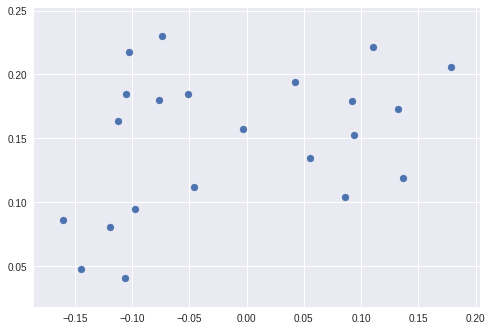

In [30]:
np.random.seed(17) # Fijamos una semilla para asegurar la reproducibilidad de la práctica

data_file_url = 'https://raw.githubusercontent.com/jhernandezgonzalez/unsupervisedlearning/master/datasets/sinteticos/dataset_reducido.csv'
Dx_un = np.array(pd.read_csv(data_file_url,header=0))
Dx_un = Dx_un[ np.random.choice(np.arange(Dx_un.shape[0]), Dx_un.shape[0], replace=False) ,:]

plt.scatter(Dx_un[:,0], Dx_un[:,1])
plt.show()

Dendrograma según criterio de disimilitud: mínima, máxima, media


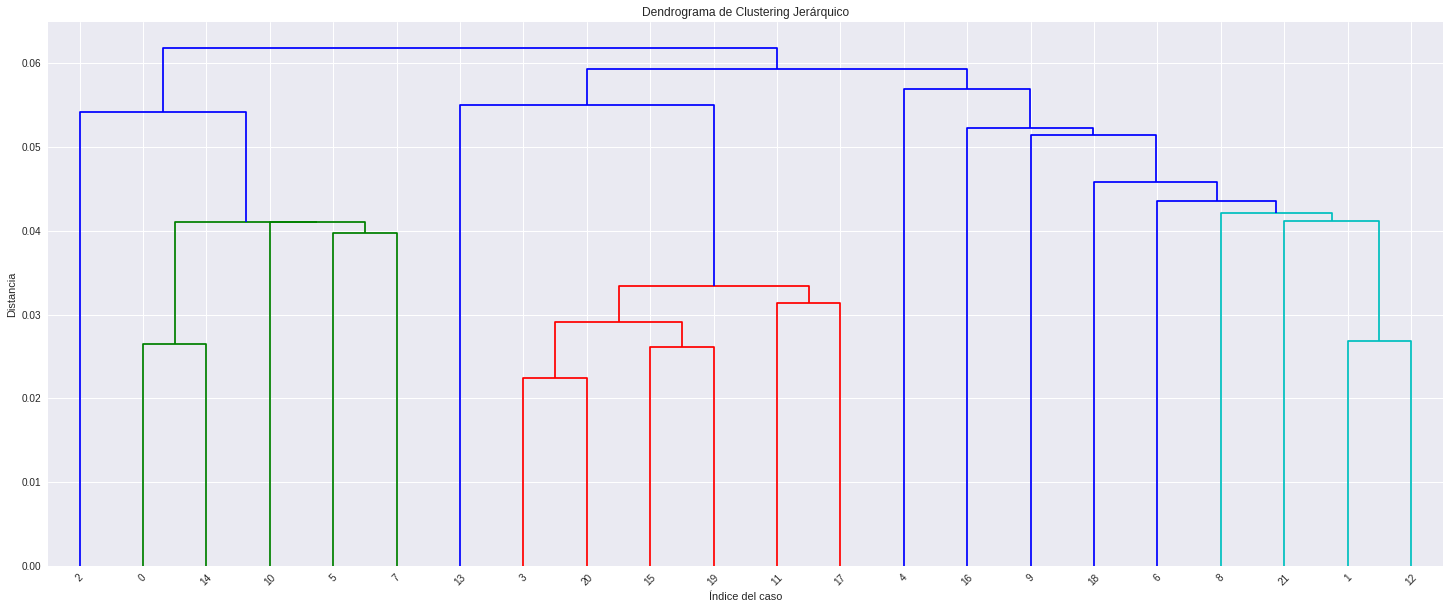

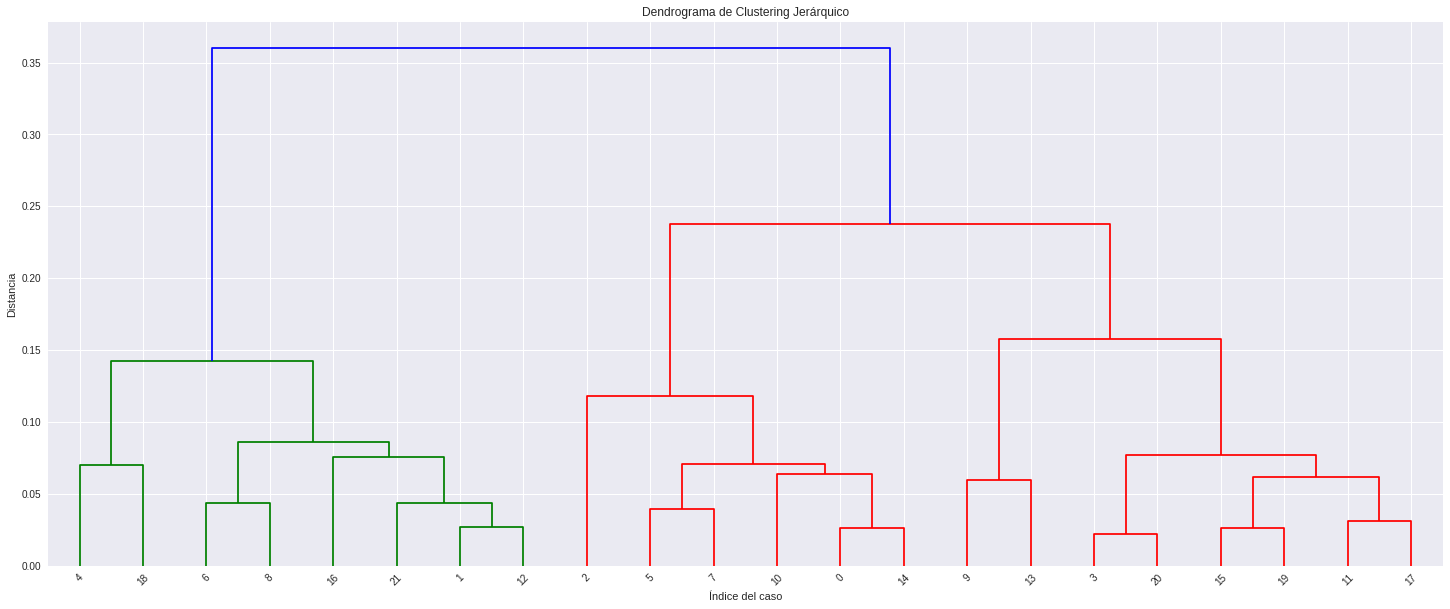

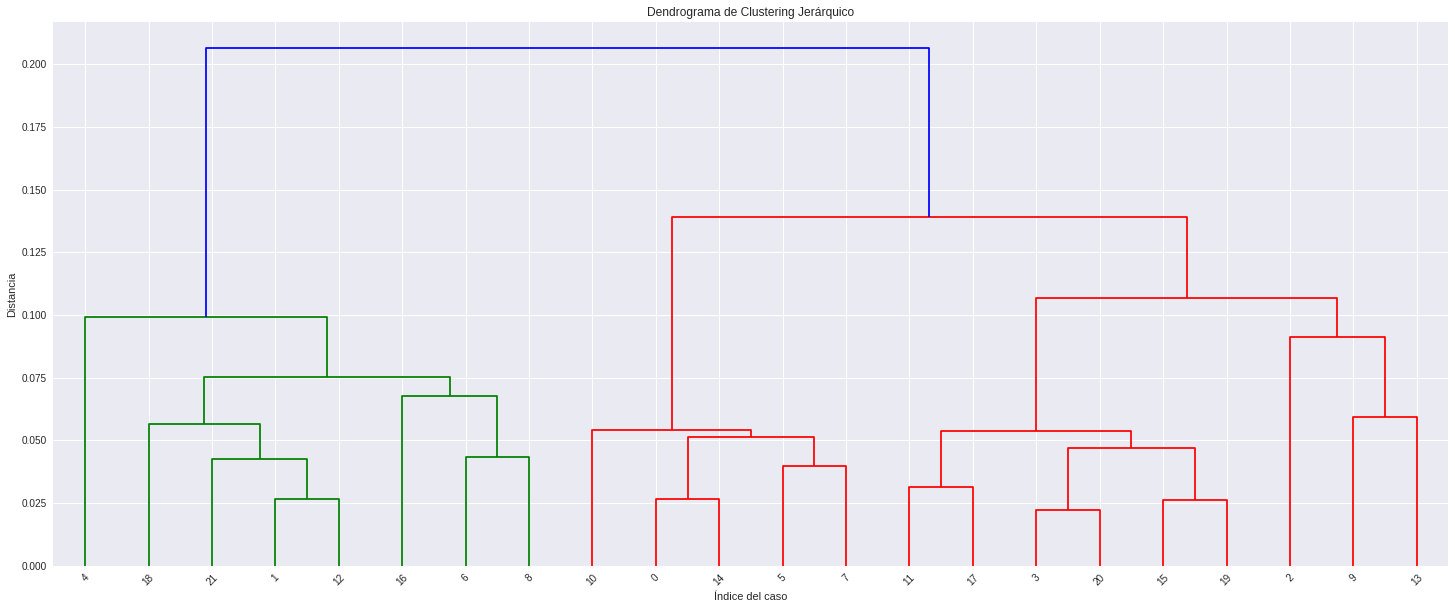

In [32]:
# Creamos la matriz de enlaces para cada criterio
#matriz_enlaces(modelo_single)
#matriz_enlaces(modelo_complete)
#matriz_enlaces(modelo_average)


modelo_single_un = linkage(Dx_un, 'single')   # disimilitud mínima
modelo_complete_un = linkage(Dx_un, 'complete') # disimilitud máxima
modelo_average_un = linkage(Dx_un, 'average')  # disimilitud media

#Representamos el dendrograma según cada criterio de disimilitud
print("Dendrograma según criterio de disimilitud: mínima, máxima, media")
plot_den(modelo_single_un)
plot_den(modelo_complete_un)
plot_den(modelo_average_un)

In [0]:
def evaluar_cluster_un(K):

    clust_single=calcular_clusters(modelo_single_un, K)
  
    clust_complete=calcular_clusters(modelo_complete_un, K)

    clust_average=calcular_clusters(modelo_average_un, K)

    return clust_single, clust_complete, clust_average
    
def plot_cluster_un(Dx, vector_clusters):
    fig, ax = plt.subplots(1,3, figsize=(20,5))
    ax[0].scatter(Dx[:,0], Dx[:,1], c=vector_clusters[0], cmap='rainbow')
    ax[0].set_title('Disimilitud mínima, k=%s'%K)
        

    ax[1].scatter(Dx[:,0], Dx[:,1], c=vector_clusters[1], cmap='rainbow')
    ax[1].set_title('Disimilitud máxima, k=%s'%K)
    

    ax[2].scatter(Dx[:,0], Dx[:,1], c=vector_clusters[2], cmap='rainbow')
    ax[2].set_title('Disimilitud media, k=%s'%K)
    
    plt.figure()
 

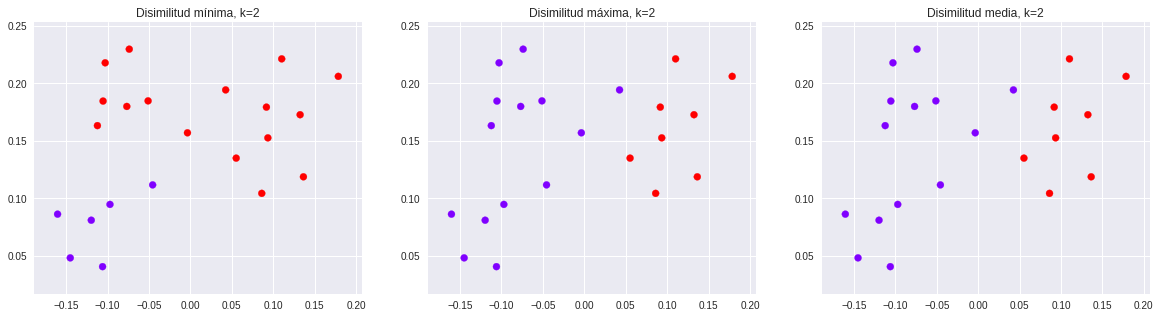

<Figure size 576x396 with 0 Axes>

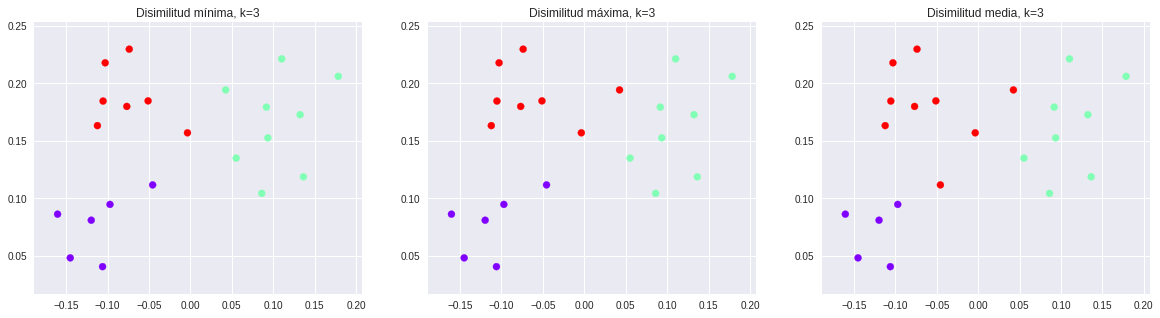

<Figure size 576x396 with 0 Axes>

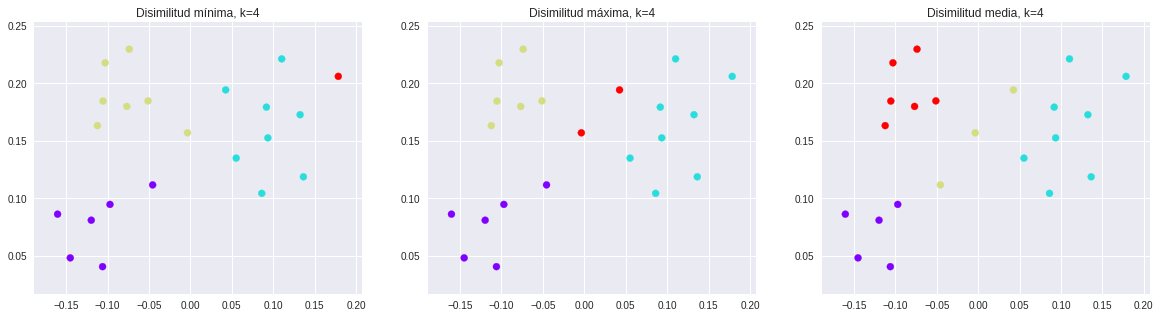

<Figure size 576x396 with 0 Axes>

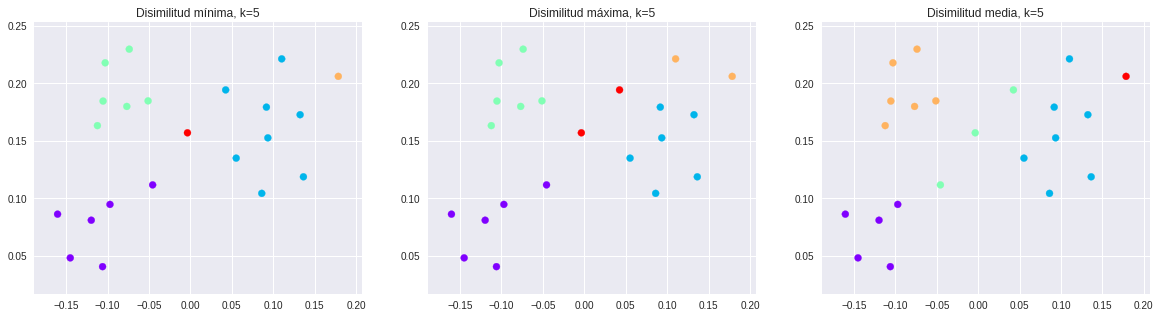

<Figure size 576x396 with 0 Axes>

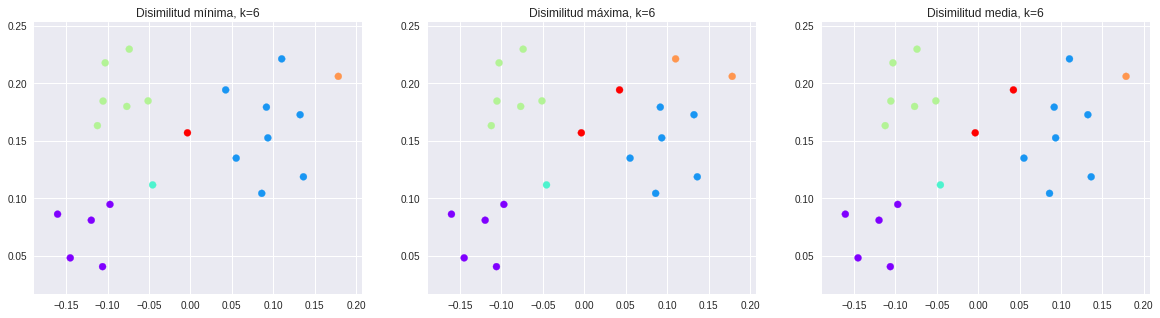

<Figure size 576x396 with 0 Axes>

In [38]:
#Evaluamos el método según diferentes valores de K y usando los 3 criterios de disimilitud: mínima, máxima, media

index_k=0
vector_clusters = {}
for K in range(2,7):
  vector_clusters[index_k]=evaluar_cluster_un(K)
  plot_cluster_un(Dx_un, vector_clusters[index_k])
  index_k=index_k+1

In [40]:
for i in range(len(vector_clusters)):
  print("")
  print("")
  print("Metricas evaluación:")
  print('K=%s'%(i+2))
  for y in range(len(vector_clusters[i])):
    print()
    print('Disimilitud mínima',silhouette_score(Dx_un,vector_clusters[i][y]))
    print('Disimilitud mínima',calinski_harabaz_score(Dx_un,vector_clusters[i][y]))



Metricas evaluación:
K=2

Disimilitud mínima 0.34763849974383726
Disimilitud mínima 13.881457561060367

Disimilitud mínima 0.5115302788587264
Disimilitud mínima 34.525933716636

Disimilitud mínima 0.5115302788587264
Disimilitud mínima 34.525933716636


Metricas evaluación:
K=3

Disimilitud mínima 0.5214152726868524
Disimilitud mínima 45.874492081681694

Disimilitud mínima 0.4756044359709163
Disimilitud mínima 39.25060541095616

Disimilitud mínima 0.48286680036848223
Disimilitud mínima 40.32749773765812


Metricas evaluación:
K=4

Disimilitud mínima 0.38328461641052347
Disimilitud mínima 35.63780823438172

Disimilitud mínima 0.396912589465728
Disimilitud mínima 37.73625335635972

Disimilitud mínima 0.4408872869802952
Disimilitud mínima 39.06472472659191


Metricas evaluación:
K=5

Disimilitud mínima 0.27197236115412593
Disimilitud mínima 30.970889148074132

Disimilitud mínima 0.3845488974016339
Disimilitud mínima 37.03773165513482

Disimilitud mínima 0.36500377275267154
Disimilitud mí